# March 18

## DOTNET Setup

### Learning how to set up DOTNET to create a C# based web app.
1. Install DOTNET SDK
2. Create ASP.NET webapp project in directory using ```dotnet new webapp```.
3. Use ```dotnet watch run``` to run app with hot reload enabled.

### Learning how to use ASP.NET through tutorials/experimenting

- Structure is very similar to using express with js. Program.cs is the backend file, equivilent to server.js. Index.cshtml is the client side HTML, equivilent to index.html. Index.cshtml.cs is the client side front end file, equivilent to index.js.
- Some videos used:
    https://www.youtube.com/watch?v=7jOI9sh08nA
    https://www.youtube.com/watch?v=FqCHwSH56PA
    https://www.youtube.com/watch?v=5vdPYahb6Cc
- Found out there are many folders/files automatically generated by dotnet which should be gitignored as they are temporary data and can cause issues with git. e.g. /obj
- Use ```dotnet new gitignore``` to automatically create the gitignore file.

## C\# Learning

### About the language
- Directly related to the DOTNET framework, Microsoft programming solutions. C\# is most popular.
- DOTNET the method of compiling C\# so it can be cross-platform.
- Can be used for many different types of projects e.g. Windows apps, mobile apps, web apps, games, AI.
- Syntatically similar to Java and uses same principle of "write once run anywhere".
- Strongly typed however also allows for implicitly defined variables.
- Object Oriented.
- Does have async & await.

## Dynamic Programming Workflow

### Learning how to program dynamically in a team
- We have implented a VSCode extension called Kanbn to teach ourselves how to program collaboratively using dynamic programming.
- The goal it to take advantage of the prioiritising and scheduling of the workflow it allows.
- Main obstacle is to get used to keeping it up to date as we work and choosing what to work on in a smart and efficient manor.

# April 2

## Microsoft Azure

### Tutorial learning

- We created a Microsoft Azure account with a 12-month free trial which we will use to deploy our project.
- We worked through the Azure tutorial on the Azure portal to get to grips with what is offered and what features we might want to take advantage of for our solution.
- The free account comes with $200 of free credit which can be used to host services like a SQL DB (which we will need for storing song lyrics) and the app itself.
- Azure also offers services like translation and speech-to-text. We will implement the translation feature to speed up the development process as well as eliminating the need to store translations of songs in the DB. The speech-to-text is a possible feature which could be implemented to make the learning process more natural as language is more often spoken than typed.
- We learned that there are many regions which your application can be deployed in which will affect the performence of the app depending on where it is being used.
- We learned that if a second account is created it can be granted privaleges to access resources for the project.

## Agile Workflow & Git

### Managing how we coordinate changes

- Before going off to work on our assigned parts of the app, we each added our plan of action to the Kanbn file. This caused an issue as we were still both pushing to the main branch. This causes a huge amount of frustration trying to handle the conflicts. We ended up making a temporary branch on git with my changes and then merging them with the main branch holding Ben's changes.
- We used ```git checkout -b tempBranch``` to create this branch.
- After some discussion and watching a tutorial on collaborating with git (https://www.youtube.com/watch?v=ygqx50-JHEE), we decided we would each make new branches on which we will develop and test before having meetings at the end of each work period when we merge to main and sort out any conflicts.
- After making changes on our respective branches, we each pushed our changes and then used github to create pull requests to the main branch. Once we checked there were no conflicts, we merged the changes onto main.
- Neither of us had worked collaboratively using git before so this was a useful learning experience as we now have a better understanding of version control with multiple branches.

## ASP.NET/C# Work

### Styling

- I began working on the styling of the main page of the app and creating basic elements which I will build on.
- I realised that some of the pre-packaged elements that ASP.NET provides (e.g. nav-bar) are defined in a seperate file ```Pages/Shared/Layout.cshtml```. They also have a seperate connected file for styling using mostly bootstrap ```_Layout.cshtml.css```.
- In order to have more control over styling, I disconnected the some of the nav-bar from bootstrap and re-styled it in the general styling document ```wwwroot/css/site.css```.

## Azure-Github Deployment

### Creating Azure Directory

- Collaboratively, Ben and I created a "directory" on Azure on which we are both owners. On this directory, we created a "web app" called LyricalLearning. We configured it to use the UK South server and on the free model which gives us 60mins per day of deployment time.
- Next, we connected the GitHub repo to the Azure web app.
- We then attempted to deploy the app in its current basic state, this did not work. We were returned a "403 IP forbidden" error. After some research, we realised that it was because we had configured the app not to have public access, meaning GitHub was not able to deploy onto Azure.
- Once we amended this issue, we re-ran the actions on GitHub and it worked successfully, allowing us to view the web app on a public domain on any device.
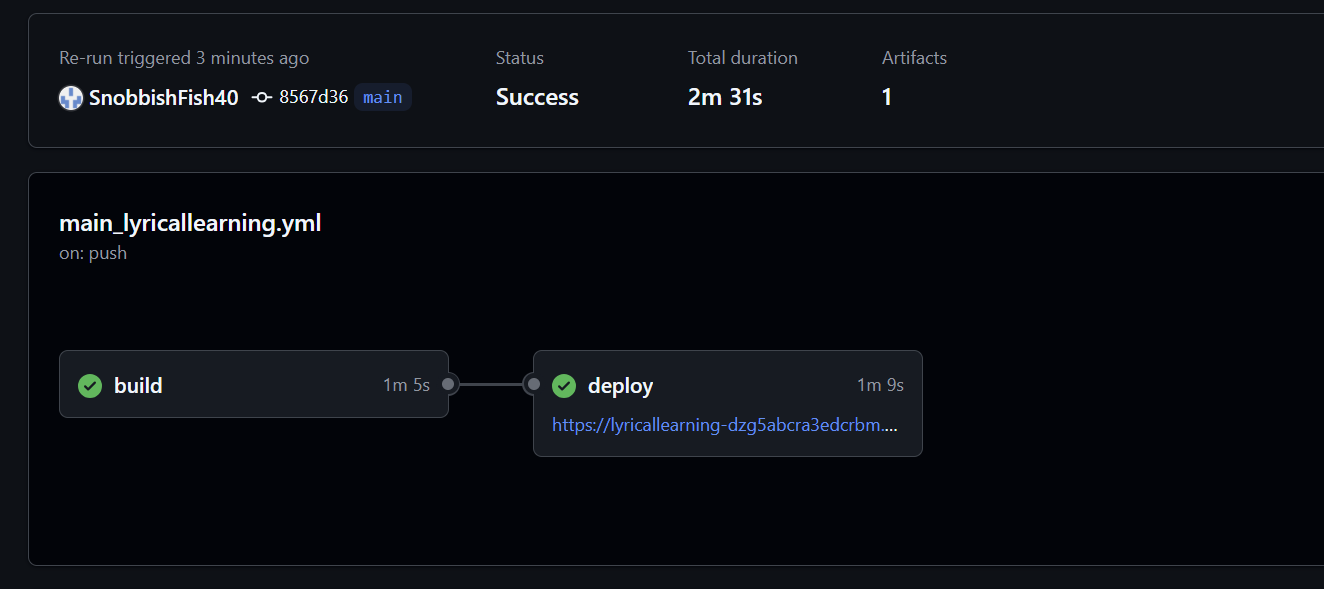
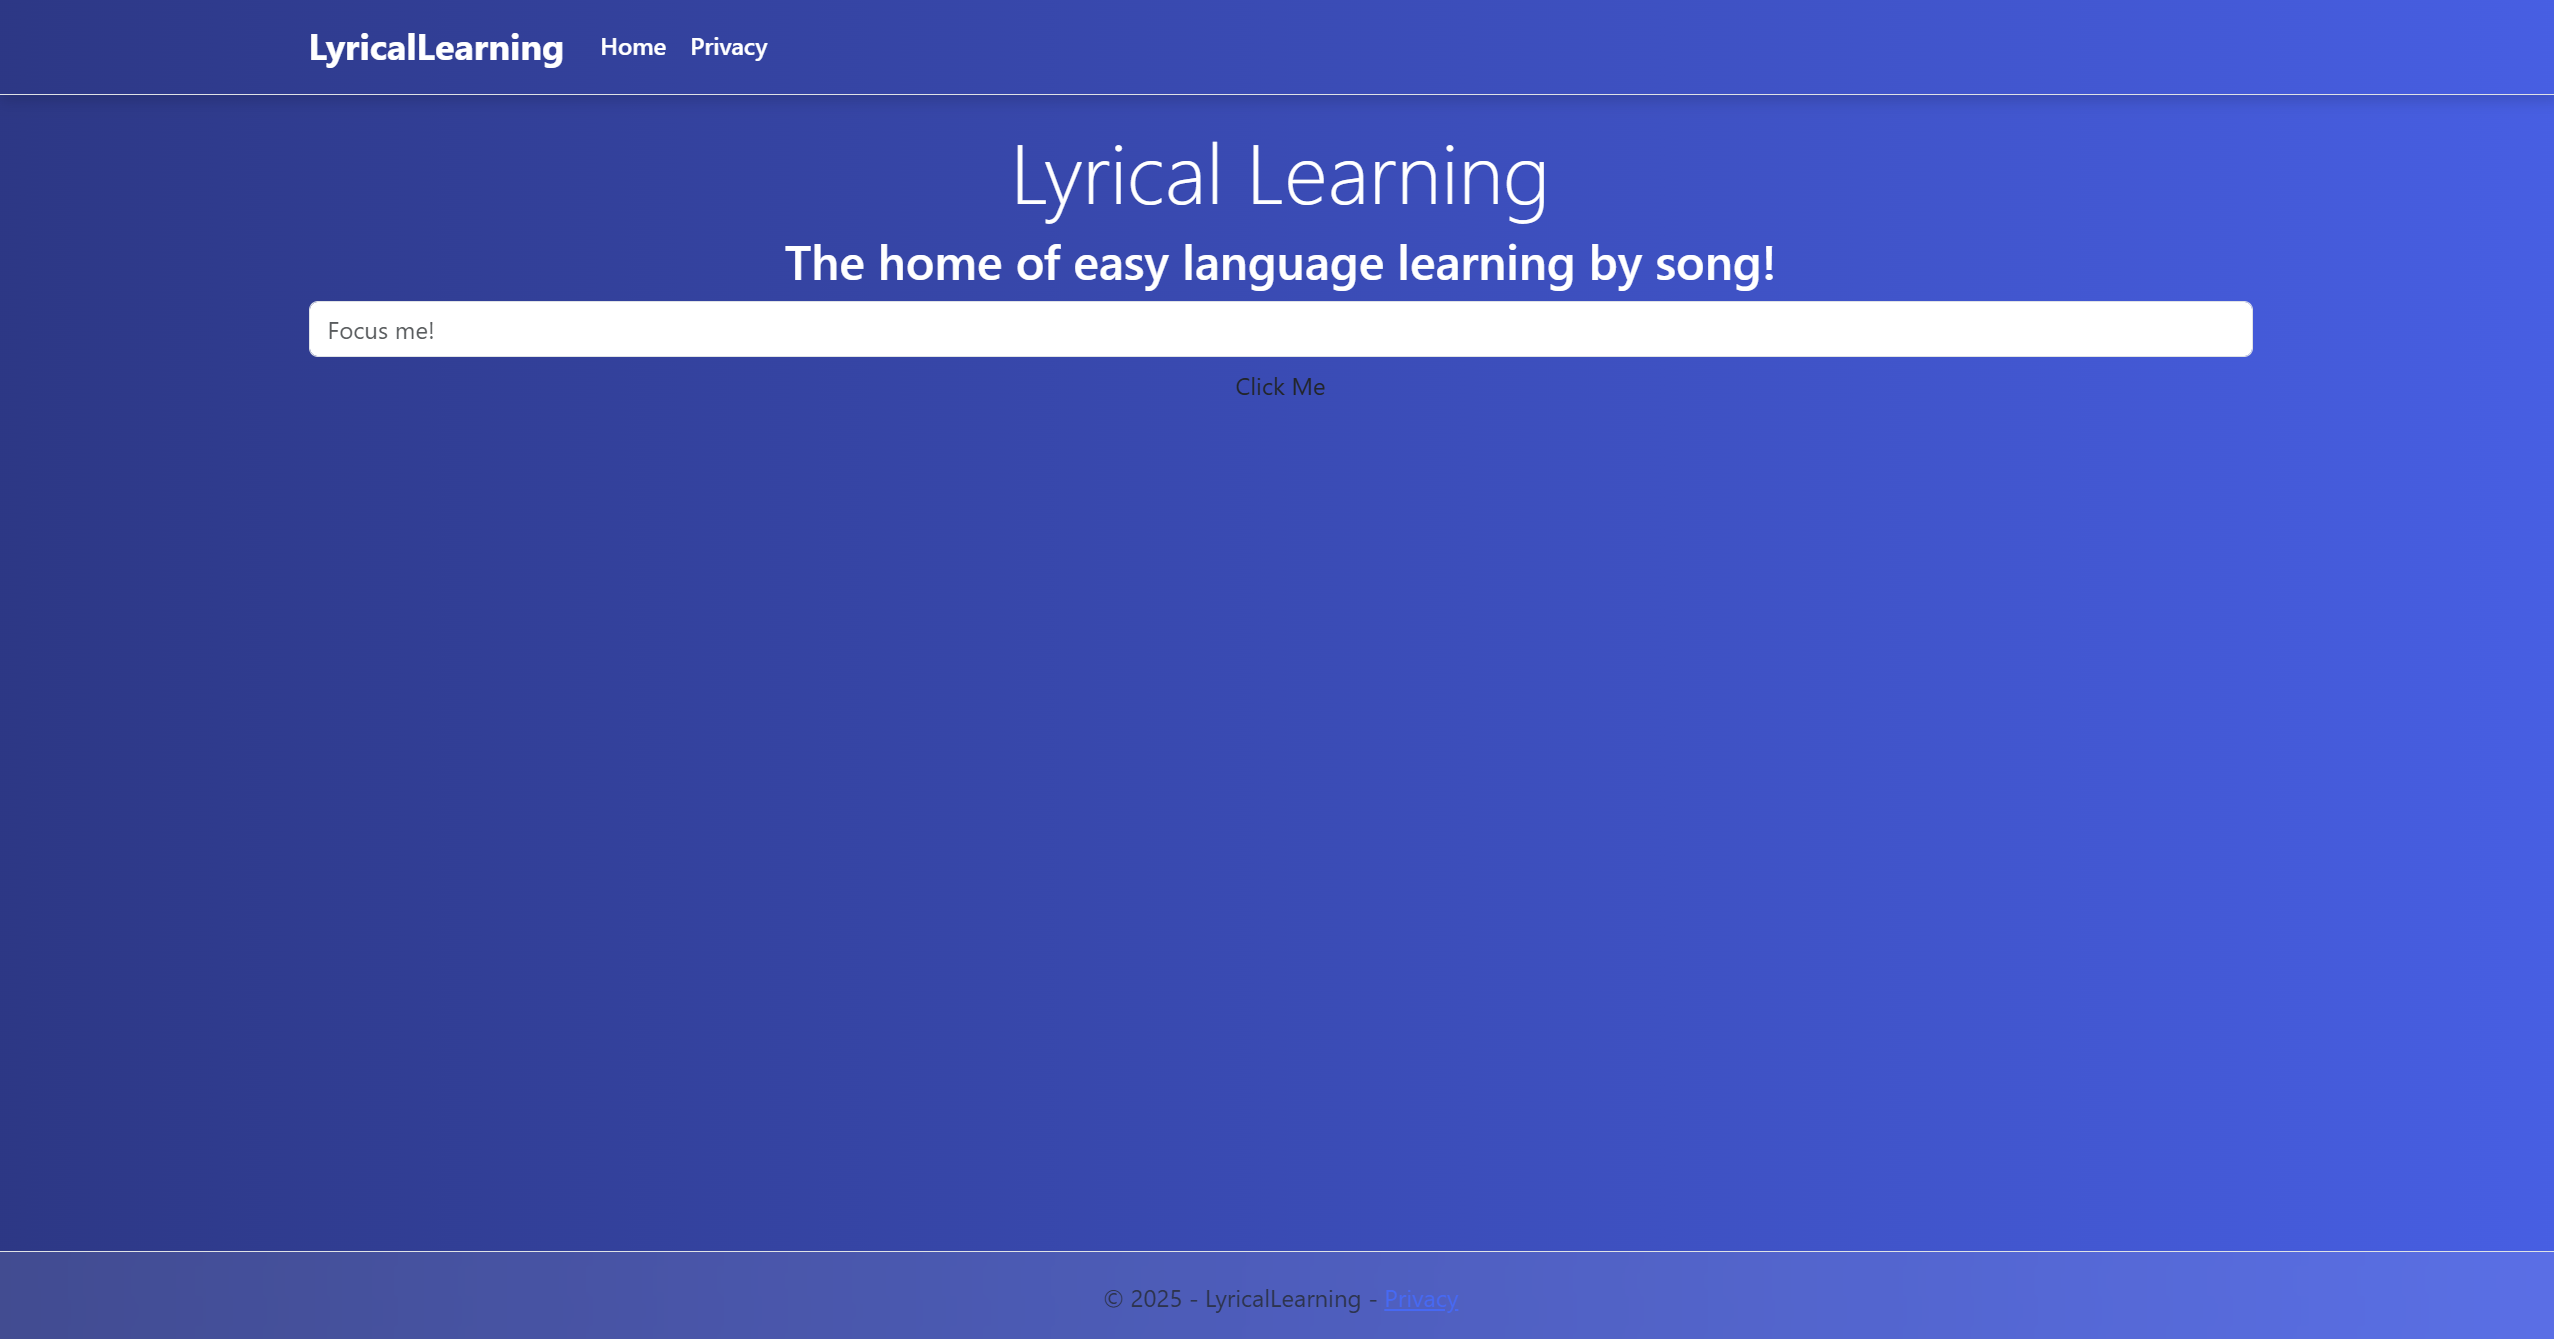

# April 8

## ASP.NET/C# Work

- I worked through some tutorials to ensure I understood how to format my code in C# web apps before implementing some front end code.
- As working, I realised most of the older tutorials were using an architecture called MVC which used a folder that I didn't have called "controllers". After some research, I realised that it is now formatted so each cshtml file has a corresponding controller file ending with cshtml.cs where the server side logic is handled.
- In order to get used to using ASP.NET, I opted to not use these controller files and instead created my routes in the Program.cs file which is like a server file for the entire site. This is more similar to a REST-style architecture so was more familiar to me.
- I learned that while this structure is acceptable to use, the standard for ASP.NET is usually to use each files corresponding controller file for the server routing as it is more scalable and keeps different pages logic seperate. I may aim to transition to this at some point.
- For the song titles and lyrics, I created fixed lists as a placeholder before I learn how to connect to the SQL DB that Ben has created.
- I also added some search functionality so that songs are dynamically filtered out as text is added to the search field.
- There is a page model for displaying lyrics which grabs them from the route with an id in Program.cs.
- In terms of next action, on the front-end I need to improve styling especially for the lyrics page and add some transitions. On the back-end I need to hook up the DB so that the songs can be stored there instead of fixed lists.

# April 10

## Connecting back end to DB

- Since Ben had finished setting up the DB in Azure, I was able to get started on changing the routes in Program.cs to retrieve song data from the DB rather than fixed lists.
- Creating an SQL query was quite simple once ```Microsoft.Data.SqlClient``` was imported.
- First, set up the connection to the DB using these two lines:
    - ```string connectionString = builder.Configuration.GetConnectionString("DefaultConnection")!;```
    - ```using var connection = new SqlConnection(connectionString);```
- Next, construct the desired query:
    ```- string sql = "SELECT Id, Title, Lyrics FROM Songs WHERE Id = @Id";```
- Build the query object and assign it to ```command```. The ```using``` keyword here automatically disposes of the command when usage is complete:
    - ```using var command = new SqlCommand(sql, connection);```
- To pass in the ```@Id``` value in the query without directly appending it (which is vunerable to SQL injections) use this line:
    - ```command.Parameters.AddWithValue("@Id", id);```
- A reader can then be used to interpret the returned values:
    ```
        using var reader = command.ExecuteReader();

        if (reader.Read())
        {
            song = new Song
            {
                Id = reader.GetInt32(0),
                Title = reader.GetString(1),
                Lyrics = reader.GetString(2)
            };
        }
    ```
- The song object can then be returned to the front-end as usual.
- I found it particularly interesting that values had to be passed into queries by a specific function to avoid SQL injection vunerabilities.
- Another learning point was that when collaborating on a project where a different team member is developing an aspect of the project that I have to implement, it is very important to communicate as we ran into an issue where my interpretation of the database was not exactly how Ben had structured it and so the code did not work immediately.

# April 11

## Connecting DB

### Connecting DB remotely

- A major obstacle in the way of development using the DB was being able to connect to the DB without deploying the program in Azure every time. We discovered that putting the value of the connection string in appsettings.json meant it would be able to connect remotely, making testing substancially more efficient.

### Reworking the retrieval from the DB

- After a consultation between Ben and I, we decided on how the DB would store songs to make it scalable as well as how we wanted to serve the songs broken down into words/sentences/paragraphs.
- 